<a href="https://colab.research.google.com/github/rr-y/IPP-Assignments/blob/master/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf

### Small Corpus

In [0]:
corpus = "He is the king . The king is royal . She is the royal  queen"
corpus = corpus.lower()

### Vocabulary Generation

In [0]:
words = []
for word in corpus.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word


In [55]:
words

{'he', 'is', 'king', 'queen', 'royal', 'she', 'the'}

In [56]:
word2int

{'he': 4, 'is': 6, 'king': 3, 'queen': 5, 'royal': 0, 'she': 2, 'the': 1}

In [57]:
int2word

{0: 'royal', 1: 'the', 2: 'she', 3: 'king', 4: 'he', 5: 'queen', 6: 'is'}

### Sentance Generation

In [0]:
raw_sentences = corpus.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [59]:
sentences

[['he', 'is', 'the', 'king'],
 ['the', 'king', 'is', 'royal'],
 ['she', 'is', 'the', 'royal', 'queen']]

### Dataset Generation

In [0]:
data = []
WINDOW_SIZE = 1
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [61]:
data

[['he', 'is'],
 ['is', 'he'],
 ['is', 'the'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'the'],
 ['the', 'king'],
 ['king', 'the'],
 ['king', 'is'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'is'],
 ['she', 'is'],
 ['is', 'she'],
 ['is', 'the'],
 ['the', 'is'],
 ['the', 'royal'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'royal']]

## One Hot Function

In [0]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


In [63]:
x_train.shape

(20, 7)

In [64]:
y_train.shape

(20, 7)

### TensorFlow Model

In [0]:
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))


### First Layer

In [0]:
EMBEDDING_DIM = 10 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

### Second Layer

In [0]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

### TF Session

In [76]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))


loss is :  6.639437
loss is :  5.611787
loss is :  4.866522
loss is :  4.2854986
loss is :  3.8197632
loss is :  3.4533875
loss is :  3.1700406
loss is :  2.9518971
loss is :  2.7835915
loss is :  2.6504047
loss is :  2.5403981
loss is :  2.4460948
loss is :  2.3633797
loss is :  2.2898865
loss is :  2.2240112
loss is :  2.164479
loss is :  2.1101906
loss is :  2.0601926
loss is :  2.0136807
loss is :  1.9700047
loss is :  1.9286537
loss is :  1.88924
loss is :  1.8514729
loss is :  1.8151363
loss is :  1.7800697
loss is :  1.7461548
loss is :  1.7133042
loss is :  1.6814547
loss is :  1.6505635
loss is :  1.6206055
loss is :  1.591572
loss is :  1.5634695
loss is :  1.5363194
loss is :  1.510158
loss is :  1.4850334
loss is :  1.461004
loss is :  1.4381323
loss is :  1.4164774
loss is :  1.3960869
loss is :  1.376988
loss is :  1.3591801
loss is :  1.3426306
loss is :  1.3272785
loss is :  1.3130381
loss is :  1.2998098
loss is :  1.2874885
loss is :  1.2759726
loss is :  1.2651691
lo

In [0]:
vectors = sess.run(W1 + b1)


In [78]:
vectors

array([[ 0.4931677 ,  2.2594776 , -0.9904631 , -1.458356  ,  0.29803616,
         1.0600755 , -1.0537146 , -2.2304673 ,  0.27275294,  0.68129003],
       [-0.44214153, -0.46299493,  0.15249784, -1.1395941 , -0.5401486 ,
         0.5850897 ,  1.3671575 , -1.5045702 ,  1.3620393 , -1.368978  ],
       [ 0.89807343, -0.78109837, -0.80186707, -2.3829725 ,  1.3957756 ,
         0.7690968 ,  0.10798411, -3.786074  ,  2.6434512 , -0.37551063],
       [ 1.5911251 , -0.7388171 ,  0.4824987 , -1.4396113 ,  0.12651753,
         1.0730877 , -1.7570642 , -3.4677744 ,  1.3885615 ,  1.581501  ],
       [-0.23143363,  1.373243  ,  1.8156767 , -1.2130024 , -0.32788986,
         1.5726384 ,  0.19264856, -2.224848  ,  1.3079202 , -0.12459701],
       [-2.228983  , -0.76727223,  0.00496709, -1.8616323 , -1.078277  ,
         0.49772608, -1.1288823 , -2.276508  ,  1.4353983 , -0.05384451],
       [ 0.5343314 , -2.951917  , -0.37552893, -0.74453634,  0.44398487,
        -0.32706678, -0.88855565, -1.3258662 

### TSNE Visualization

In [0]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)


In [0]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

royal -0.6644294
the 0.38085186
she -0.6112165
king -0.9024006
he 0.98677146
queen -0.9980755
is 0.25839147


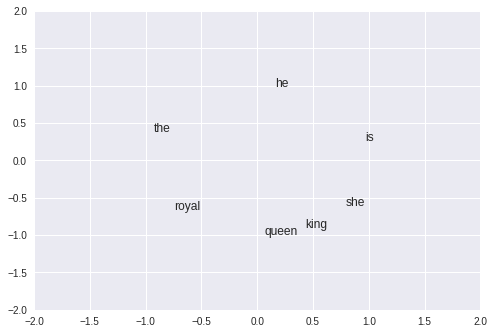

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
fig, ax = plt.subplots()
# ax.set_xscale(-1,2)
# ax.set_yscale(-1,2)
ax.axis([-2,2,-2,2])
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()